Disease Prediction Using Machine Learning
aims to implement a robust machine-learning model that can efficiently predict the disease of a human, based on the symptoms that he/she possesses. Let us look into how we can approach this machine-learning problem:

Data preparation is the primary step for any machine learning problem. We will be using a dataset from Kaggle for this problem. This dataset consists of two CSV files one for training and one for testing. There is a total of 133 columns in the dataset out of which 132 columns represent the symptoms and the last column is the prognosis.
Cleaning is the most important step in a machine learning project. The quality of our data determines the quality of our machine-learning model. So it is always necessary to clean the data before feeding it to the model for training. In our dataset all the columns are numerical, the target column i.e. prognosis is a string type and is encoded to numerical form using a label encoder.
After gathering and cleaning the data, the data is ready and can be used to train a machine learning model. We will be using this cleaned data to train the Support Vector Classifier, Naive Bayes Classifier, and Random Forest Classifier. We will be using a confusion matrix to determine the quality of the models.
After training the three models we will be predicting the disease for the input symptoms by combining the predictions of all three models. This makes our overall prediction more robust and accurate.

In [337]:
#importing necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [338]:
# reading data of file "Training.csv" into a dataframe named "dataframe"
training_data=pd.read_csv("Training.csv")
testing_data=pd.read_csv("Testing.csv")

In [339]:
training_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [340]:
testing_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [341]:
testing_data.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [342]:
#removing column which is not needed
training_data=training_data.drop(columns=['Unnamed: 133'])

In [343]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [344]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [345]:
training_data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [346]:
testing_data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [347]:
#finding correlation to study data
training_data_correlations_dataframe = training_data.select_dtypes(include=['float64', 'int64'])# taking only those data which are either 
                                                                                                #float or integer
print(training_data_correlations_dataframe.corr())

                       itching  skin_rash  nodal_skin_eruptions  \
itching               1.000000   0.318158              0.326439   
skin_rash             0.318158   1.000000              0.298143   
nodal_skin_eruptions  0.326439   0.298143              1.000000   
continuous_sneezing  -0.086906  -0.094786             -0.032566   
shivering            -0.059893  -0.065324             -0.022444   
...                        ...        ...                   ...   
small_dents_in_nails -0.061573   0.331087             -0.023073   
inflammatory_nails   -0.061573   0.331087             -0.023073   
blister              -0.061573   0.331087             -0.023073   
red_sore_around_nose -0.061573   0.331087             -0.023073   
yellow_crust_ooze    -0.061573   0.331087             -0.023073   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                         -0.086906  -0.059893 -0.175905   -0.160650   
skin_rash                       -0.0947

In [348]:
testing_data_correlations_dataframe = testing_data.select_dtypes(include=['float64', 'int64'])# taking only those data which are either 
                                                                                                #float or integer
print(testing_data_correlations_dataframe.corr())

                       itching  skin_rash  nodal_skin_eruptions  \
itching               1.000000   0.433861              0.349215   
skin_rash             0.433861   1.000000              0.321960   
nodal_skin_eruptions  0.349215   0.321960              1.000000   
continuous_sneezing  -0.100000  -0.108465             -0.034922   
shivering            -0.069843  -0.075755             -0.024390   
...                        ...        ...                   ...   
small_dents_in_nails -0.069843   0.321960             -0.024390   
inflammatory_nails   -0.069843   0.321960             -0.024390   
blister              -0.069843   0.321960             -0.024390   
red_sore_around_nose  0.200000   0.460977             -0.034922   
yellow_crust_ooze    -0.069843   0.321960             -0.024390   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                         -0.100000  -0.069843 -0.200000   -0.182574   
skin_rash                       -0.1084

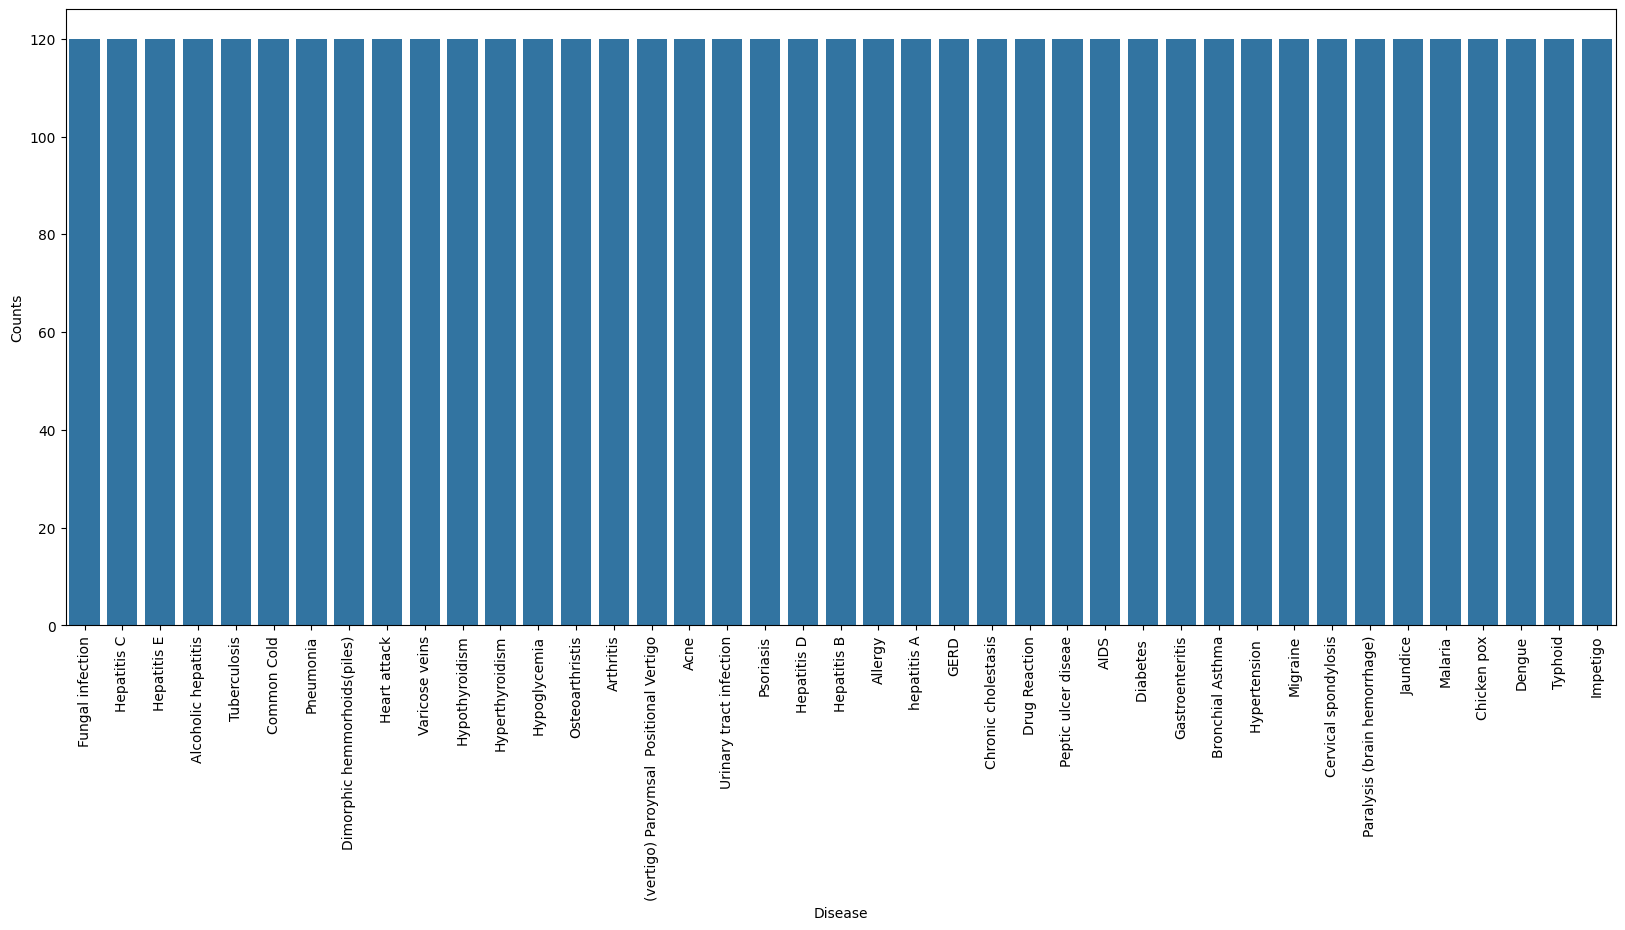

In [349]:
# Checking whether the dataset is balanced or not
disease_counts = training_data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (20,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

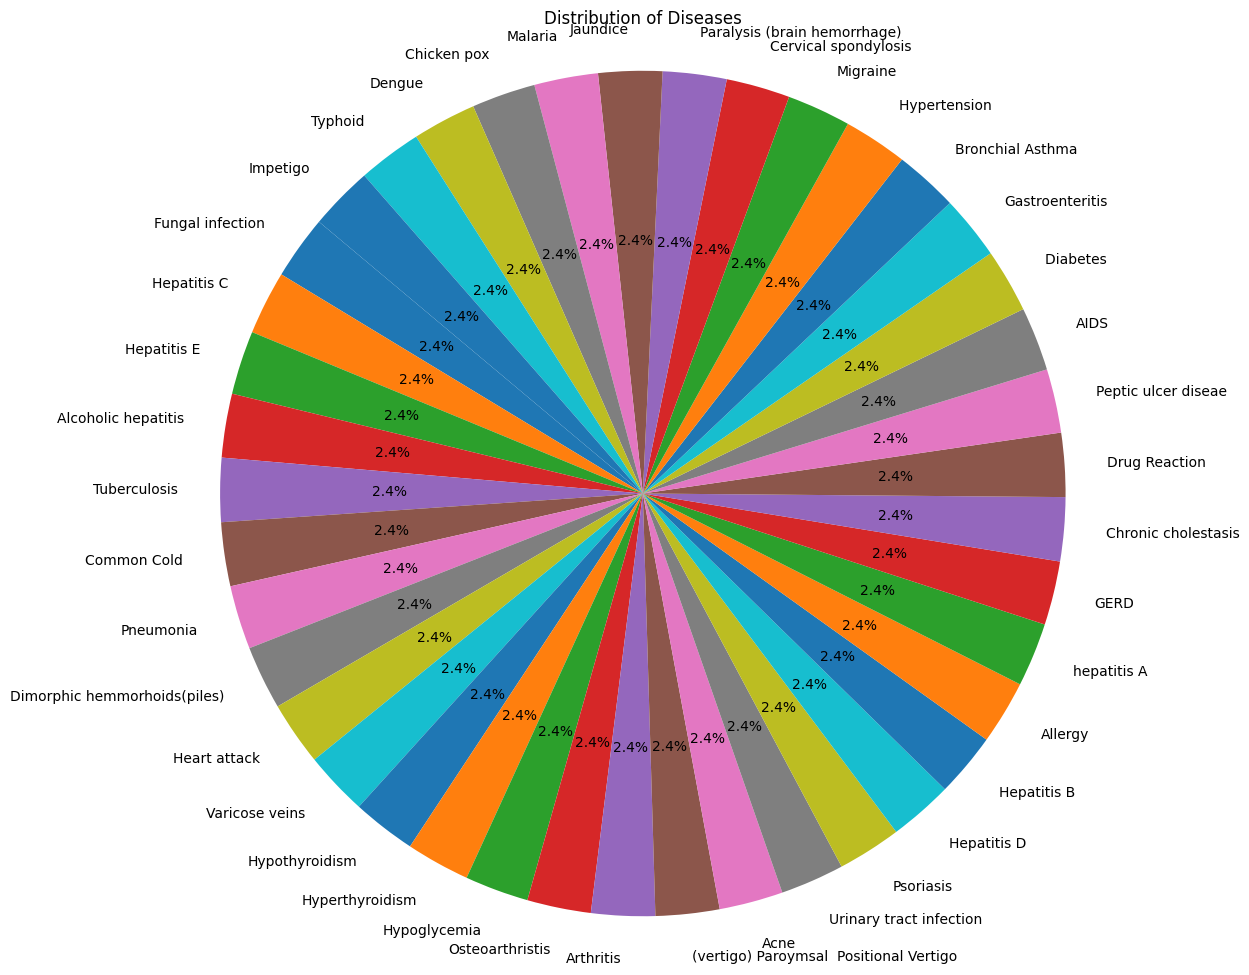

In [350]:
#Plotting pie graph to look for the percentage of disease
disease_counts = training_data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
plt.figure(figsize=(12, 12)) 
plt.pie(temp_df["Counts"], labels=temp_df["Disease"], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Diseases')  
plt.show()

In [351]:
print(disease_counts)

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [352]:
# for i, column in enumerate(training_data.columns):
#     plt.figure(figsize=(6, 4))
#     sns.histplot(data=training_data, x=column, color='green', kde=True)
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.title(f'Histogram of {column}')
#     plt.grid(False)
#     plt.show()

In [353]:
training_data.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [354]:
testing_data.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [355]:
# Label encoding the string data of the training set
encoder=LabelEncoder()
training_data['prognosis']=encoder.fit_transform(training_data['prognosis'])

In [356]:
# Label encoding the string data of the testing set
encoder=LabelEncoder()
testing_data['prognosis']=encoder.fit_transform(testing_data['prognosis'])

In [357]:
#splitting the data into features and target variable
X=training_data.drop(columns=['prognosis'])
y=training_data['prognosis']

In [358]:
#splitting the data into features and target variable
X_testing=testing_data.drop(columns=['prognosis'])
y_testing=testing_data['prognosis']

In [359]:
#Splitting the data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [360]:
#Scaling the training data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [361]:
# Initializing the Random forest, support vector and naive bias classifier model
Random_forest_classifier_model=RandomForestClassifier()
Support_vector_classifier_model=SVC()
Naive_bias_classifier_model=GaussianNB()

In [362]:
#training the Random_forest_classifier_model
Random_forest_classifier_model.fit(X_train,y_train)
y_pred_Rfc=Random_forest_classifier_model.predict(X_test)

In [363]:
#training the Support_vector_classifier_model
Support_vector_classifier_model.fit(X_train,y_train)
y_pred_Svc=Support_vector_classifier_model.predict(X_test)

In [364]:
#Training the Naive_bias_classifier_model
Naive_bias_classifier_model.fit(X_train,y_train)
y_pred_nbc=Naive_bias_classifier_model.predict(X_test)

Before doing scaling

In [369]:
print("Accuracy score of Random Forest Classifier:",accuracy_score(y_test,y_pred_Rfc))
print("Accuracy score of Support Vector Classifier:",accuracy_score(y_test, y_pred_Svc))
print("Accuracy score of Naive Bias Classifier:",accuracy_score(y_test, y_pred_nbc))

Accuracy score of Random Forest Classifier: 1.0
Accuracy score of Support Vector Classifier: 1.0
Accuracy score of Naive Bias Classifier: 1.0


In [366]:
#Scaling the testing data
X_testing=scaler.transform(X_testing)
y_testing=encoder.fit_transform(y_testing)

In [367]:
#predicted value of all model
y_pred_Rfc1=Random_forest_classifier_model.predict(X_testing)
y_pred_Svc1=Support_vector_classifier_model.predict(X_testing)
y_pred_nbc1=Naive_bias_classifier_model.predict(X_testing)

Accuracy of all model after doing Scaling and on the testing data

In [368]:
print("Accuracy score of Random Forest Classifier:",accuracy_score(y_testing, y_pred_Rfc1))
print("Accuracy score of Support Vector Classifier:",accuracy_score(y_testing, y_pred_Svc1))
print("Accuracy score of Naive Bias Classifier:",accuracy_score(y_testing, y_pred_nbc1))

0.9761904761904762
0.9761904761904762
0.9761904761904762


Confusion matric of random forest classifier model: 


<Axes: >

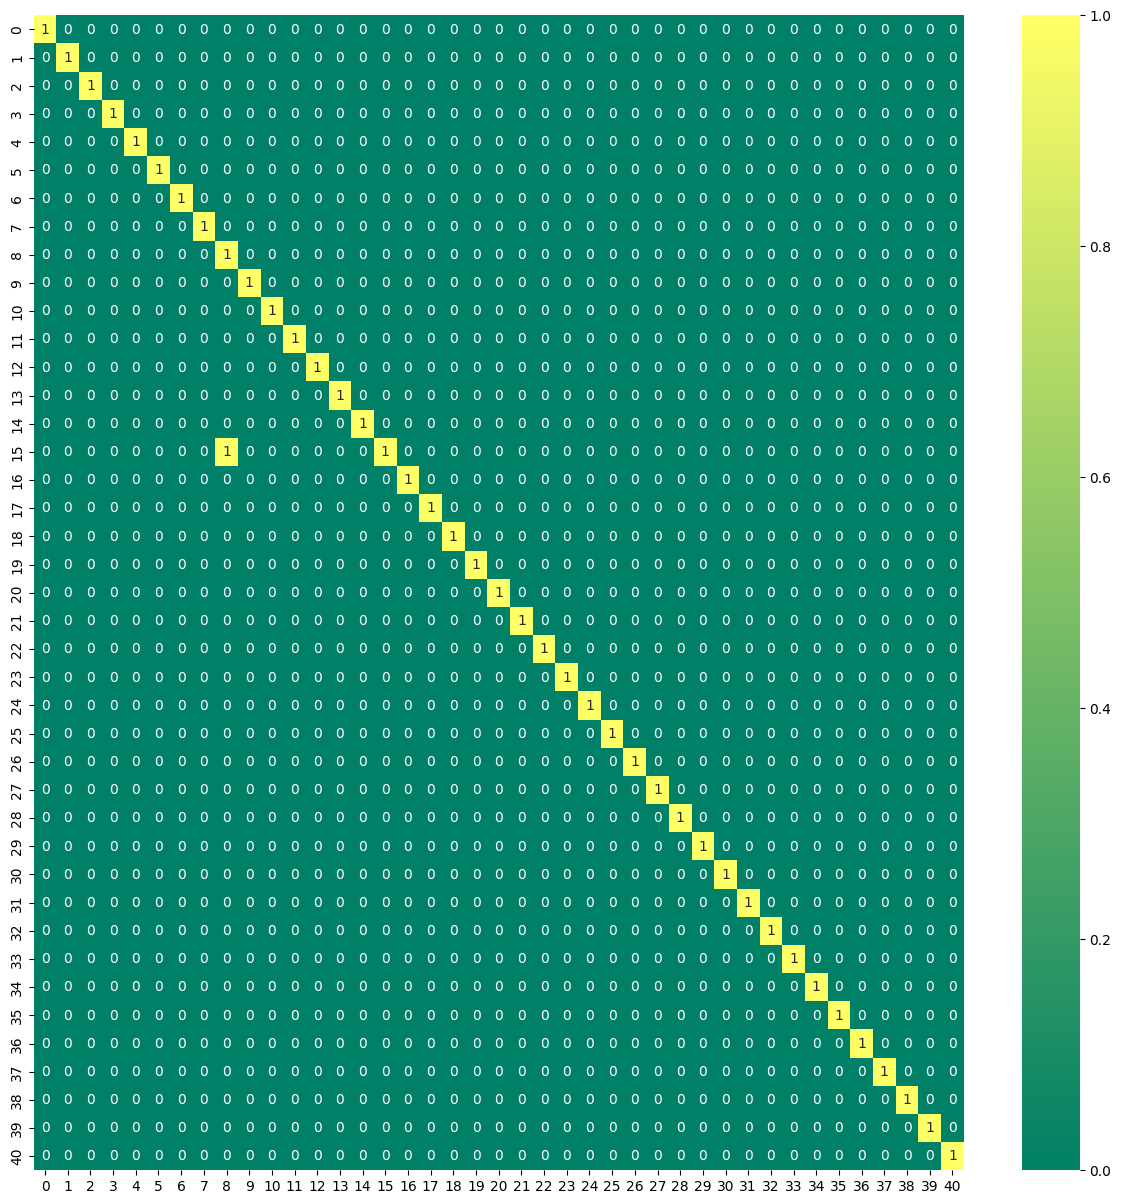

In [372]:
print("Confusion matric of random forest classifier model: ")

plt.figure(figsize=(15,15))

# using heatmap for confusion matrix of random forest model
sns.heatmap(confusion_matrix(y_testing,y_pred_Rfc1),cmap='summer',annot=True)

confusion matric of naive bayes model: 


<Axes: >

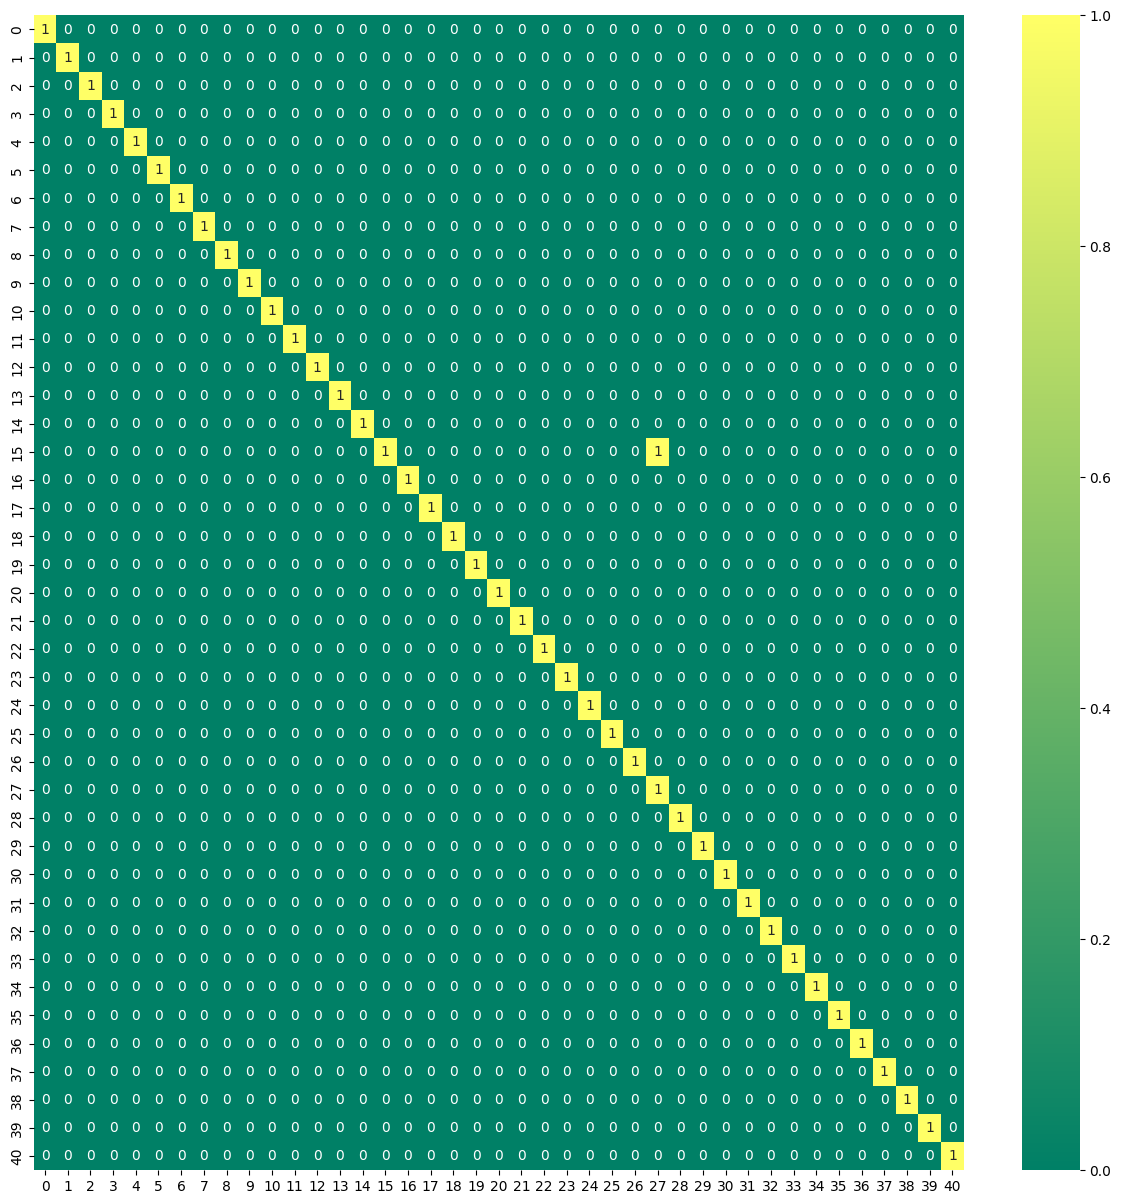

In [376]:
print("Confusion matric of naive bayes classification model: ")

plt.figure(figsize=(15,15))

# using heatmap for confusion matrix of naive bayes model
sns.heatmap(confusion_matrix(y_testing,y_pred_nbc1),cmap='summer',annot=True)

Confusion matric of support vector classification model: 


<Axes: >

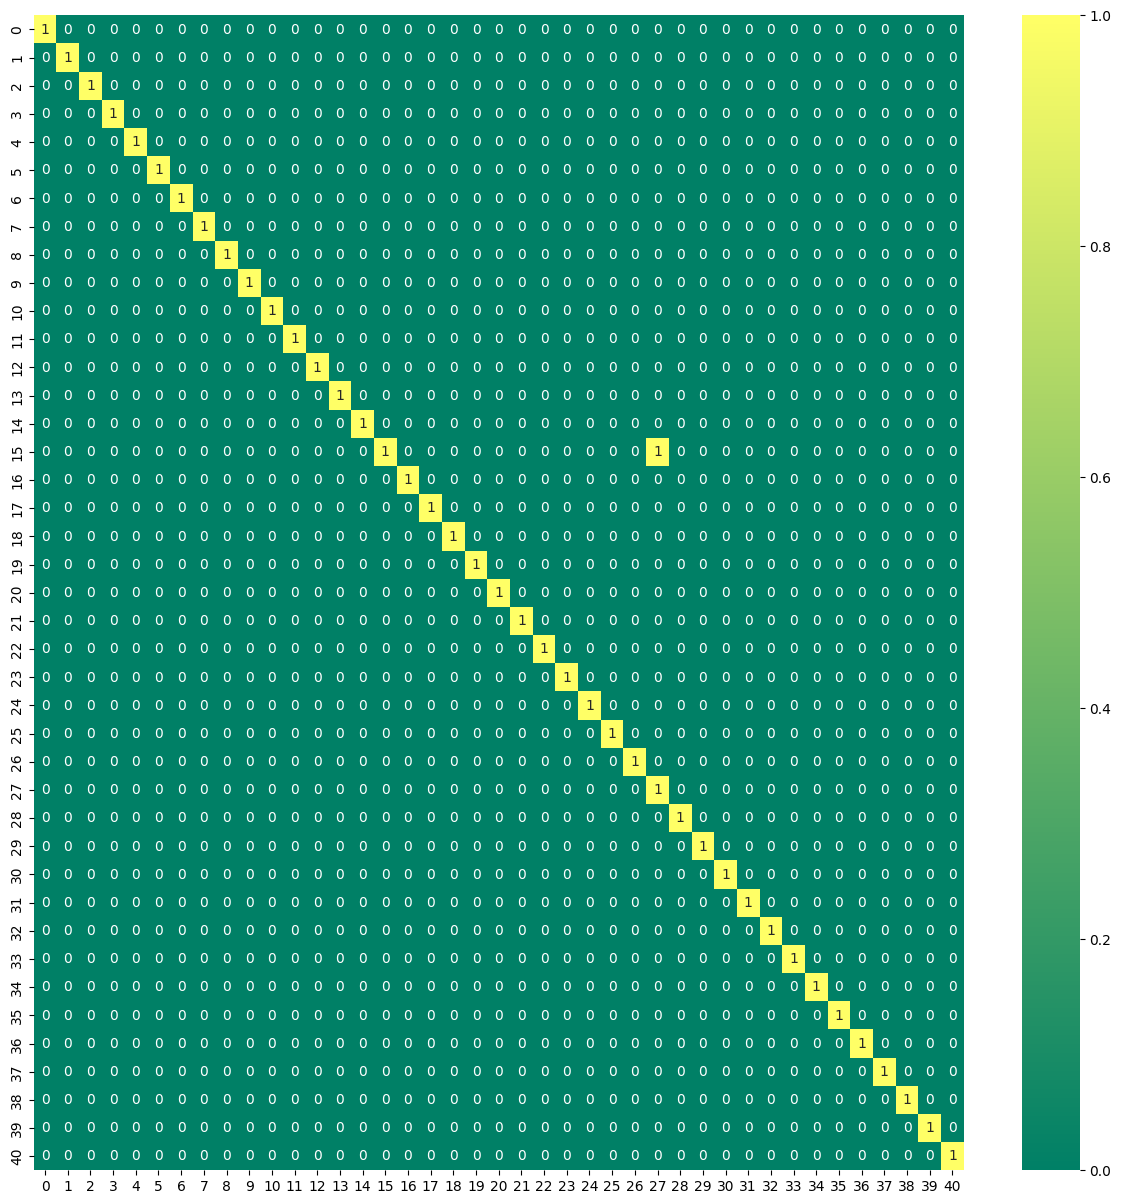

In [378]:
print("Confusion matric of support vector classification model: ")

plt.figure(figsize=(15,15))

# using heatmap for confusion matrix of support vector machine
sns.heatmap(confusion_matrix(y_testing,y_pred_Svc1),cmap='summer',annot=True)